# Objective :  Telecom Customer Churn Classification using NN
# EDA - Python
# Insights - Patterns
#  Classification (Deep Learning)

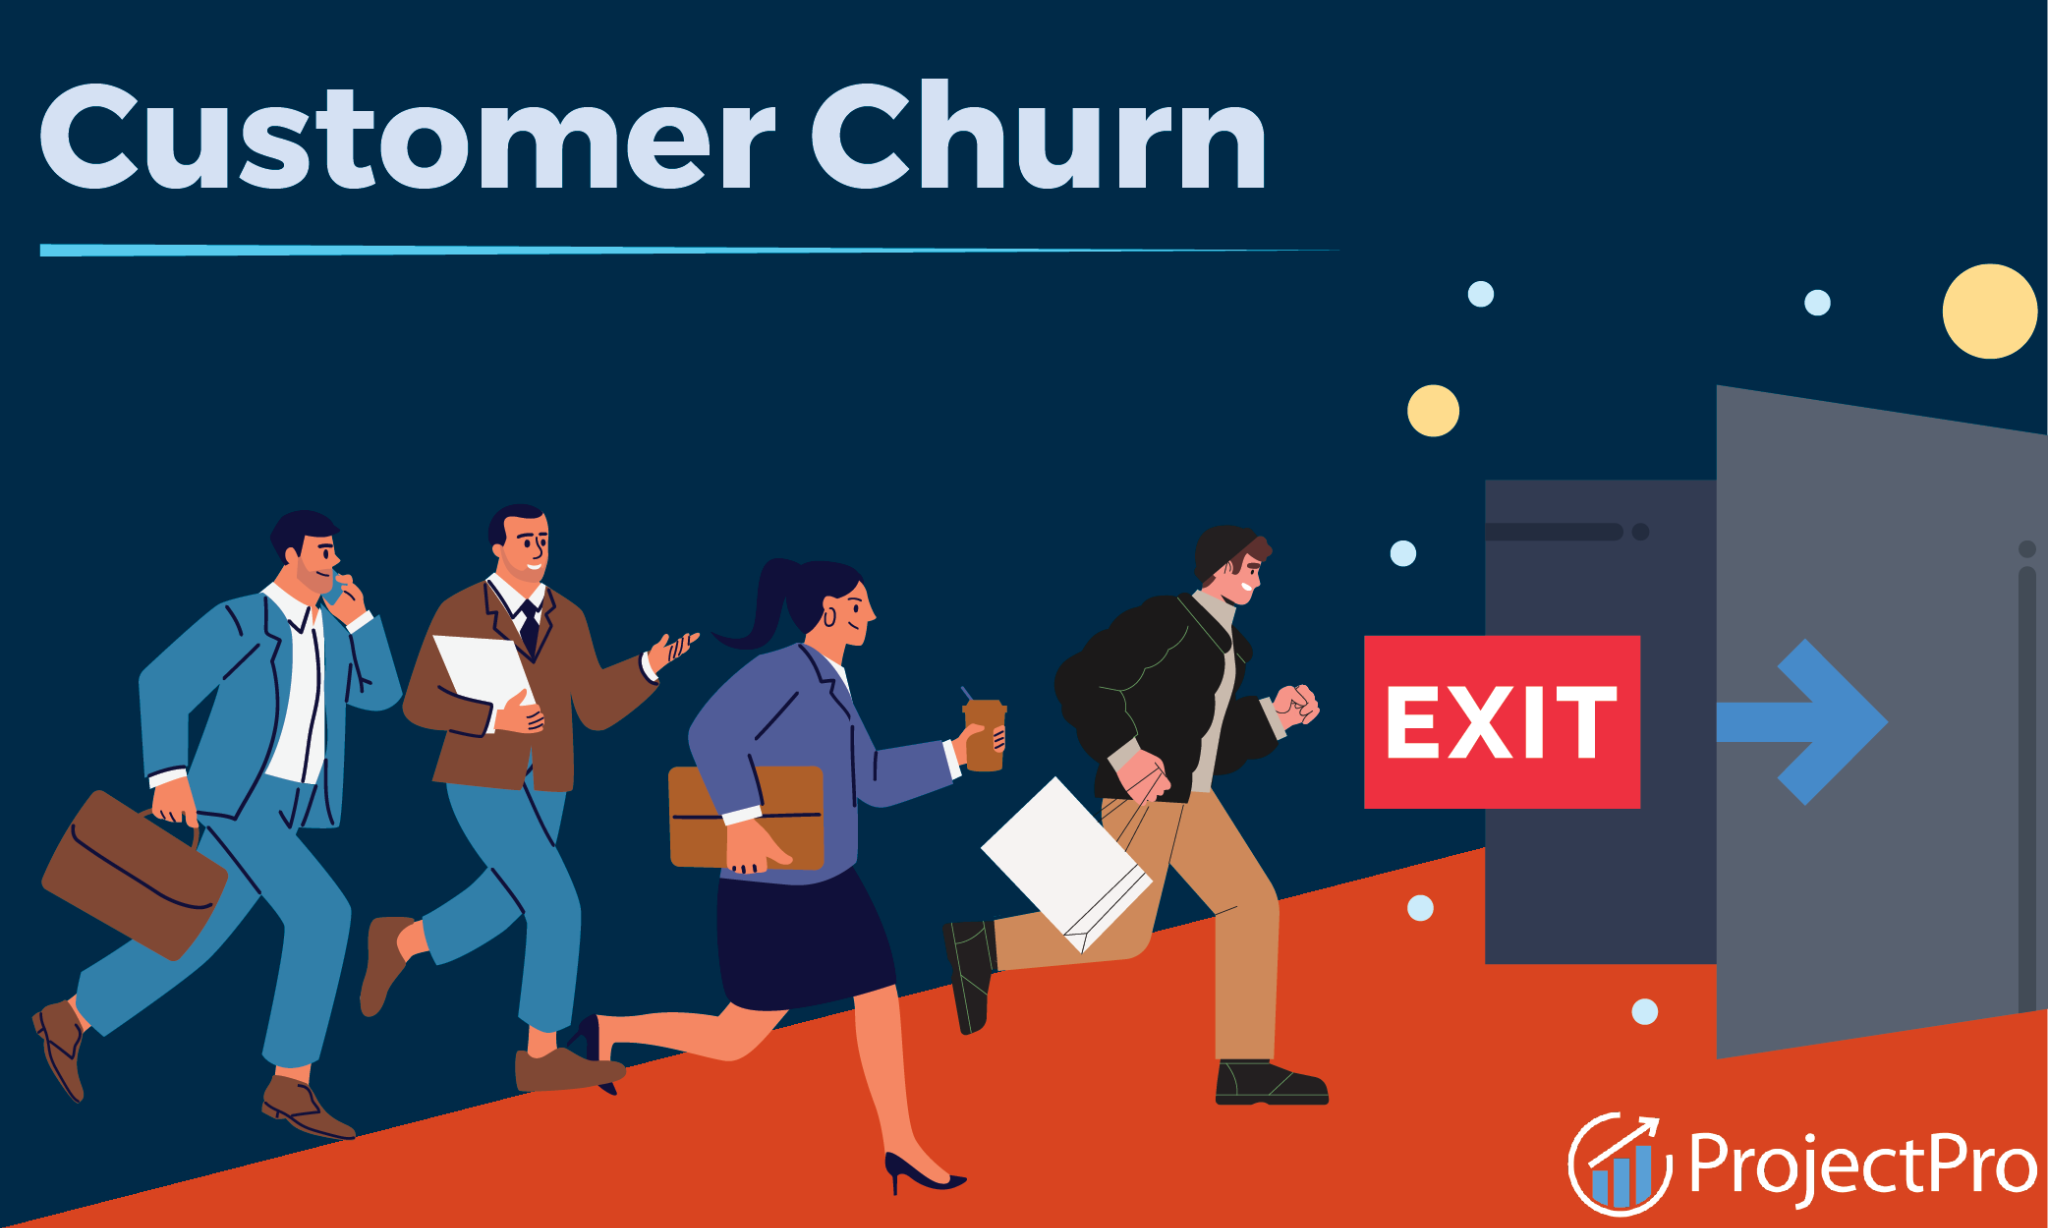

# 1. Load Python Modules

In [45]:
#  Use Python's import statement to load modules 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from tabulate import tabulate

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score,ConfusionMatrixDisplay,roc_curve,auc
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imblearn.over_sampling import SMOTE

# 2. Read the Dataset from CSV file  - Using Pandas

In [46]:
df=pd.read_csv("Telecom-Churn.csv")
df

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0


In [47]:
#drop - sensitive - non imp columns
df.drop(['customer_id','phone_no',],axis=1,inplace=True)
df.head()

,year,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


# 3. Basic Inspection on given dataset

In [48]:
def basic_inspection_dataset(table):
    """Generates a basic inspection dataset from the given table."""
    
    print("top 5 rows - using head")
    print(table.head())
    print()
        
    print("bottom 5 rows using tail")
    print(table.tail())
    print()
        
    print("numbers of samples and columns")
    print(table.shape)
    print()
    
    print("numbers of samples ")
    print(len(table))
    print()
    
    print("numbers of entries in the data frame")
    print(table.size)
    print()
    
    print("Columns Names")
    print(table.columns)
    print()

    print("Columns dtypes")
    print(table.dtypes)
    print()
    
    print("Dataframe info")
    print(table.info())
    print()
    
    print()
    print("check the missing value in each column")
    print(table.isnull().sum())
          
    print()
    print("check the missing value in each column")
    print(table.isna().sum())
    
    print(df.describe())

basic_inspection_dataset(df)

top 5 rows - using head
   year  gender  age  no_of_days_subscribed multi_screen mail_subscribed  \
0  2015  Female   36                     62           no              no   
1  2015  Female   39                    149           no              no   
2  2015  Female   65                    126           no              no   
3  2015  Female   24                    131           no             yes   
4  2015  Female   40                    191           no              no   

   weekly_mins_watched  minimum_daily_mins  maximum_daily_mins  \
0               148.35                12.2               16.81   
1               294.45                 7.7               33.37   
2                87.30                11.9                9.89   
3               321.30                 9.5               36.41   
4               243.00                10.9               27.54   

   weekly_max_night_mins  videos_watched  maximum_days_inactive  \
0                     82               1               

In [49]:
# year columns contains 2015 - no other values
df.drop(['year'],axis=1,inplace=True)
df.head()

,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


# 4, 5. Handling Missing Values - Cat & Num- Variables

In [50]:
df.isnull().sum()

gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

In [51]:
df.dropna(subset=["churn"],inplace=True)

In [52]:
df.isnull().sum()

gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     26
customer_support_calls     0
churn                      0
dtype: int64

In [53]:
#fill with mode
mode = df["gender"].mode()[0]
df["gender"].fillna(mode,inplace=True)

In [54]:
df.isnull().sum()

gender                     0
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     26
customer_support_calls     0
churn                      0
dtype: int64

In [55]:
#fill with median
median=df["maximum_days_inactive"].median()
df["maximum_days_inactive"].fillna(median,inplace=True)

In [56]:
df.isnull().sum()

gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64

##  The output column name is Churn, Problem might face: when you read you will see as a float values, so convert into int type use astype method to convert

In [57]:
df["churn"]=df["churn"].astype("int")
df['churn'] = df['churn'].map({1: 'Yes', 0: 'No'})

In [58]:
df.dtypes

gender                     object
age                         int64
no_of_days_subscribed       int64
multi_screen               object
mail_subscribed            object
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
churn                      object
dtype: object

# 6. Categorical- Variable - Analysis -Using Pipeline

gender frequency table
+---+--------+-----------+
|   | Class  | Frequency |
+---+--------+-----------+
| 0 |  Male  |   1056    |
| 1 | Female |    909    |
+---+--------+-----------+
gender Relative frequency table
+---+--------+-----------+----------------------+
|   | Class  | Frequency | Relative Frequency % |
+---+--------+-----------+----------------------+
| 0 |  Male  |   1056    |        53.74         |
| 1 | Female |    909    |        46.26         |
+---+--------+-----------+----------------------+


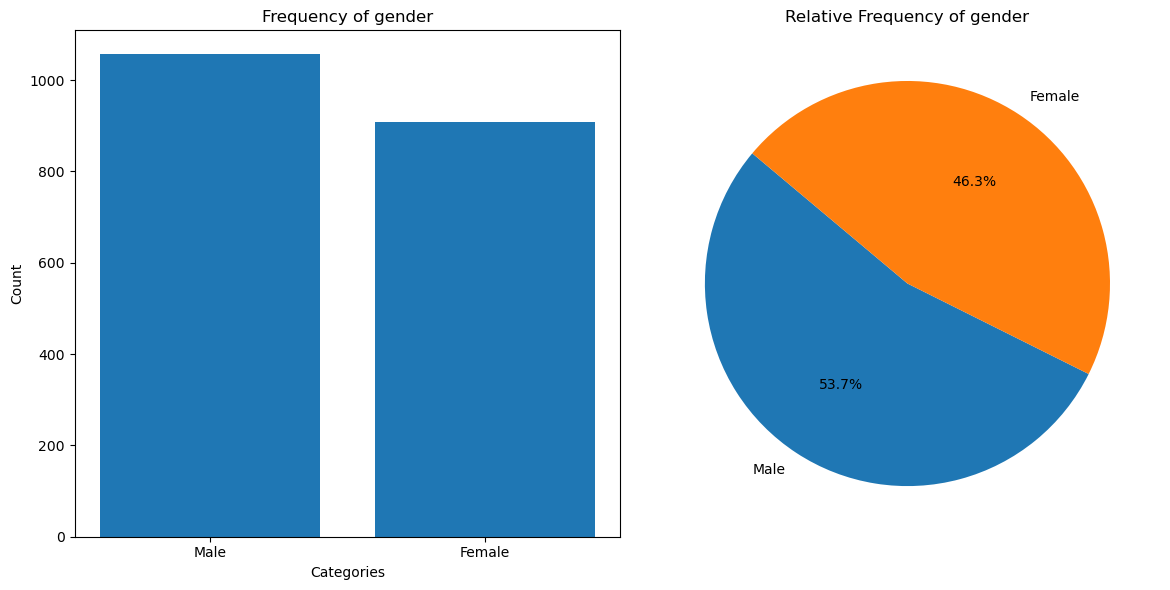

multi_screen frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  no   |   1769    |
| 1 |  yes  |    196    |
+---+-------+-----------+
multi_screen Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  no   |   1769    |        90.03         |
| 1 |  yes  |    196    |         9.97         |
+---+-------+-----------+----------------------+


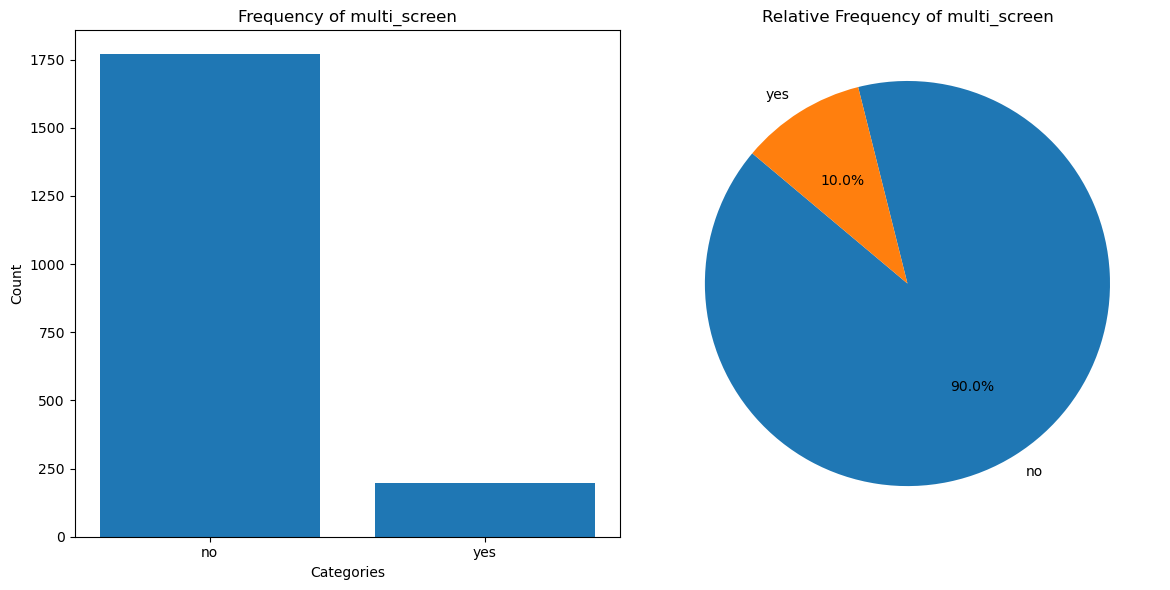

mail_subscribed frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  no   |   1404    |
| 1 |  yes  |    561    |
+---+-------+-----------+
mail_subscribed Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  no   |   1404    |        71.45         |
| 1 |  yes  |    561    |        28.55         |
+---+-------+-----------+----------------------+


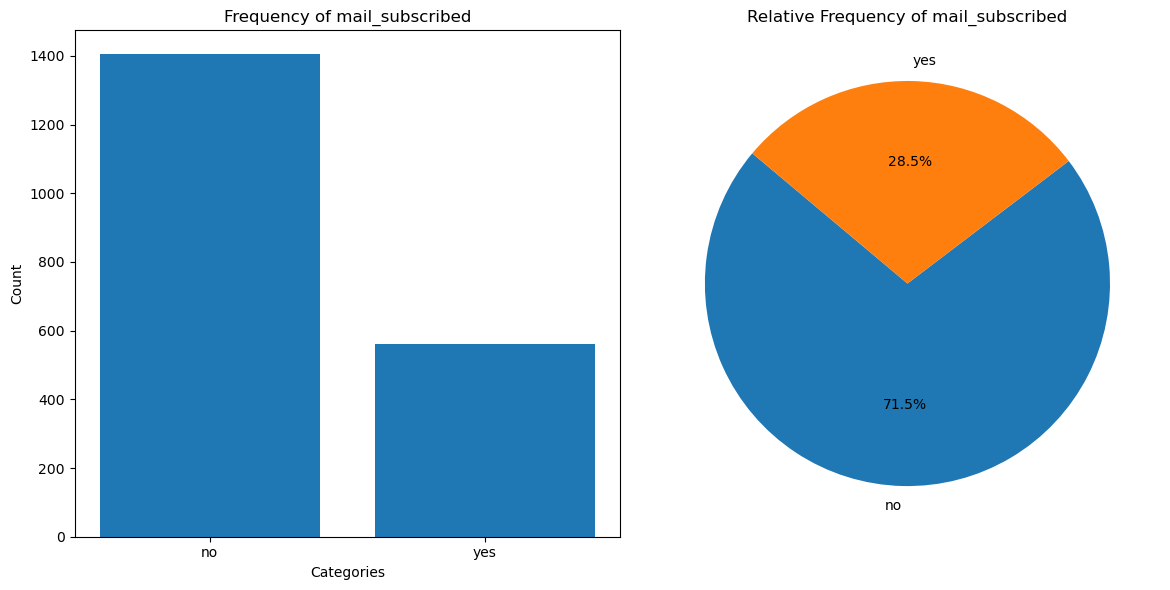

churn frequency table
+---+-------+-----------+
|   | Class | Frequency |
+---+-------+-----------+
| 0 |  No   |   1703    |
| 1 |  Yes  |    262    |
+---+-------+-----------+
churn Relative frequency table
+---+-------+-----------+----------------------+
|   | Class | Frequency | Relative Frequency % |
+---+-------+-----------+----------------------+
| 0 |  No   |   1703    |        86.67         |
| 1 |  Yes  |    262    |        13.33         |
+---+-------+-----------+----------------------+


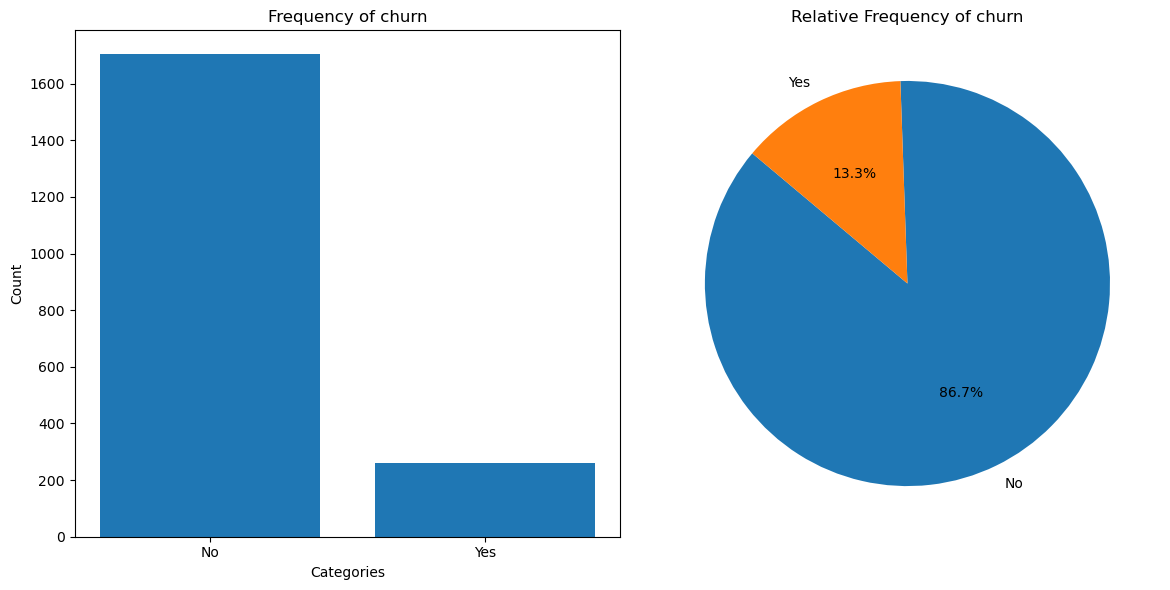

In [59]:
class BarPieChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # get cat columns 
        cat_cols = df.select_dtypes(include='object').columns
        for cat_name in cat_cols:
            value_counts = df[cat_name].value_counts().reset_index()
            # Rename the columns
            value_counts.columns = ['Class', 'Frequency']

            # Print the result as a table
            print(f"{cat_name} frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Calculate relative frequency
            total_count = value_counts['Frequency'].sum()
            value_counts['Relative Frequency %'] = round((value_counts['Frequency'] / total_count)*100,2)

            # Print the result as a table
            print(f"{cat_name} Relative frequency table")
            print(tabulate(value_counts, headers='keys', tablefmt='pretty'))

            # Extract the values and index from value counts
            value_counts = df[cat_name].value_counts()
            values = value_counts.values
            labels = value_counts.index

            fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns
            # Create a bar graph
            axs[0].bar(labels, values)
            axs[0].set_title(f'Frequency of {cat_name}')
            axs[0].set_xlabel('Categories')  # Set x-label
            axs[0].set_ylabel('Count')       # Set y-label

            axs[1].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
            axs[1].set_title(f'Relative Frequency of {cat_name}')
            plt.tight_layout()
            # Show the plot
            plt.show()  
        
pipeline_cat_var = Pipeline([
    ('cat_univaraite_analysis', BarPieChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_cat_var.fit_transform(df)        

# 7. Numerical - UniVariate - Analysis - Using -Pipeline

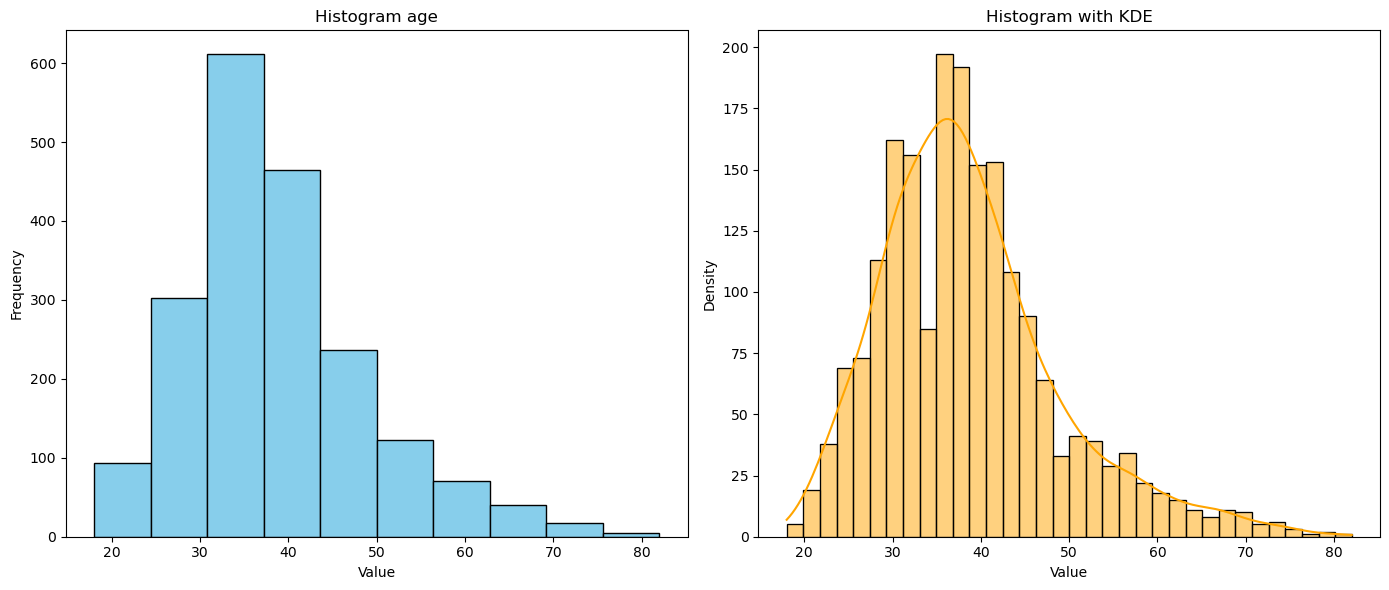

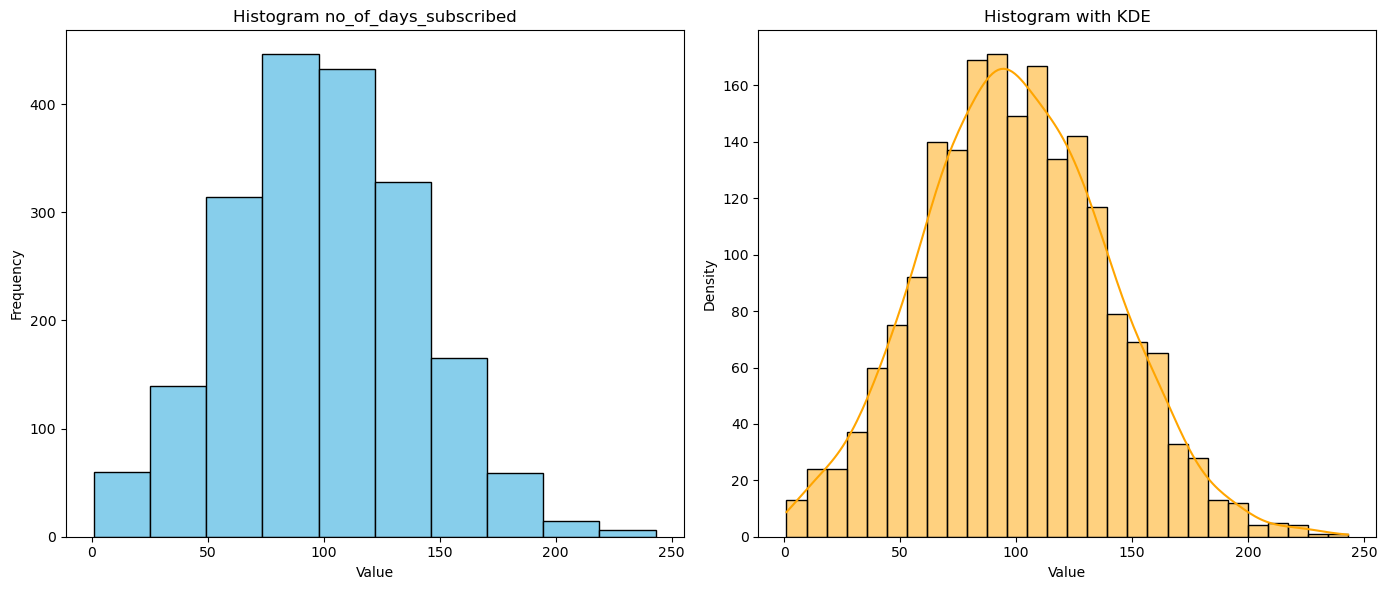

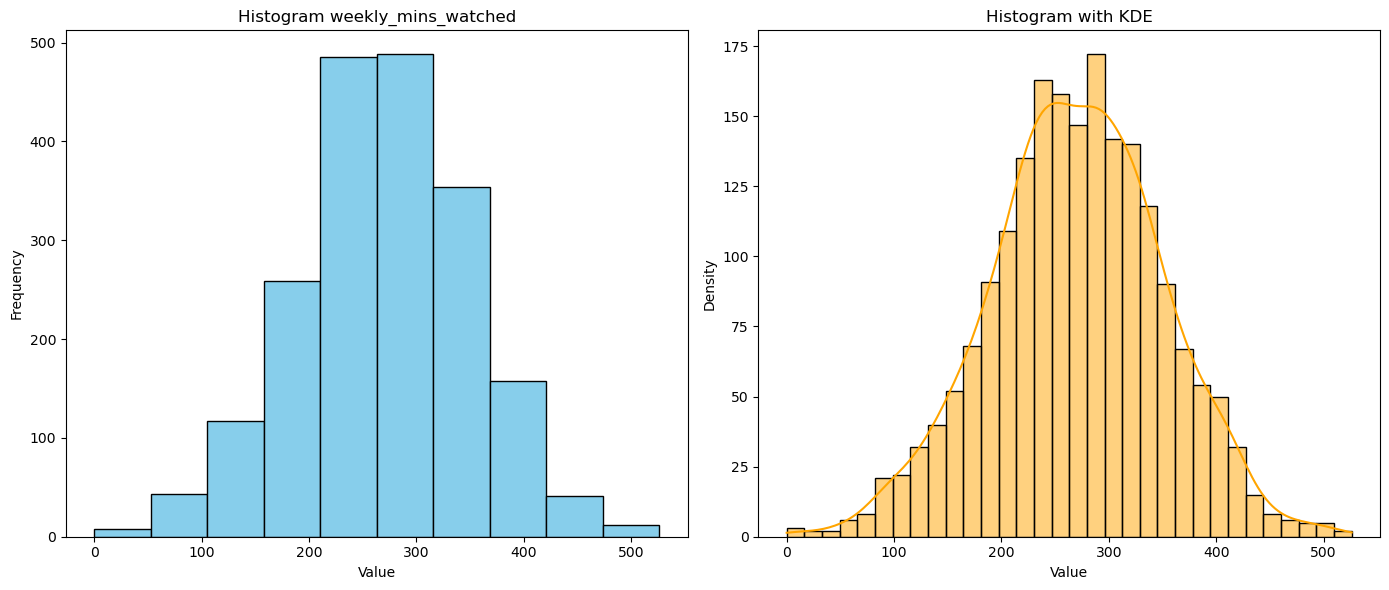

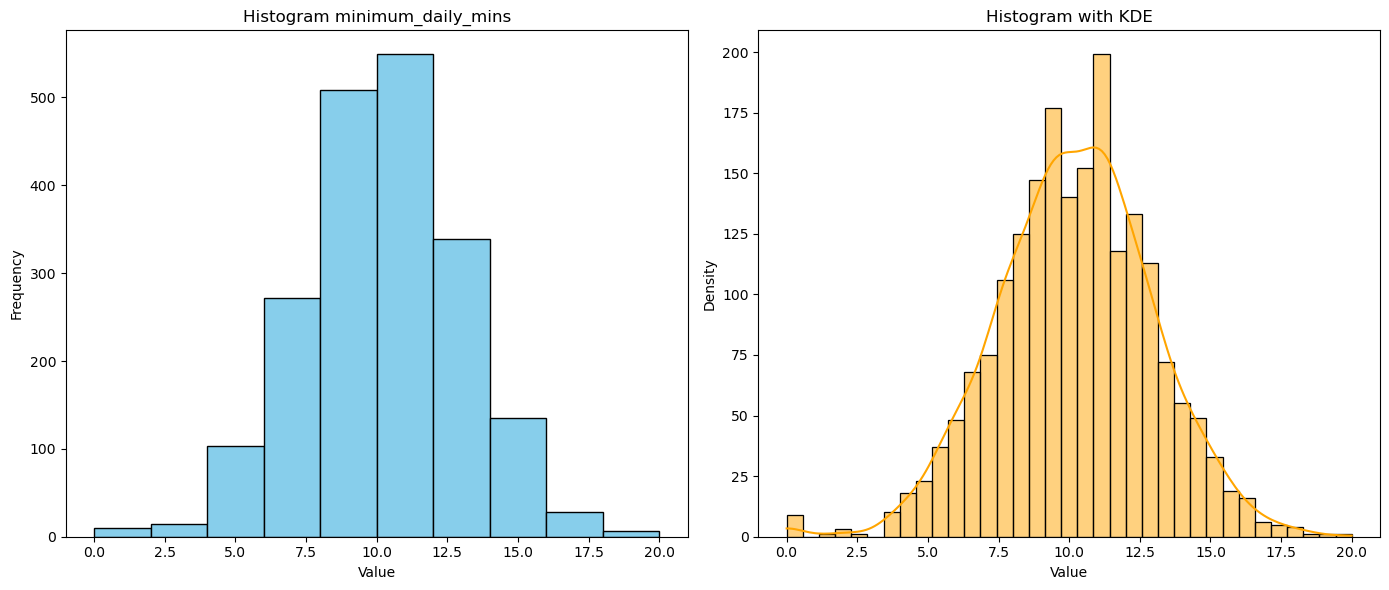

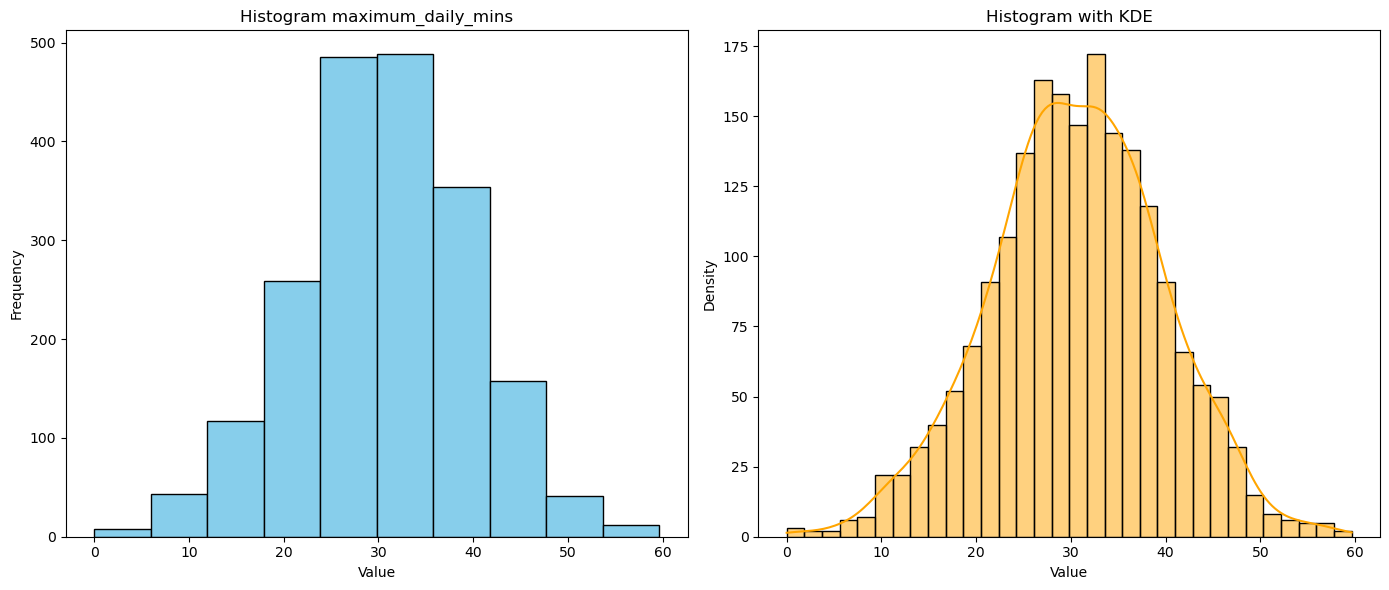

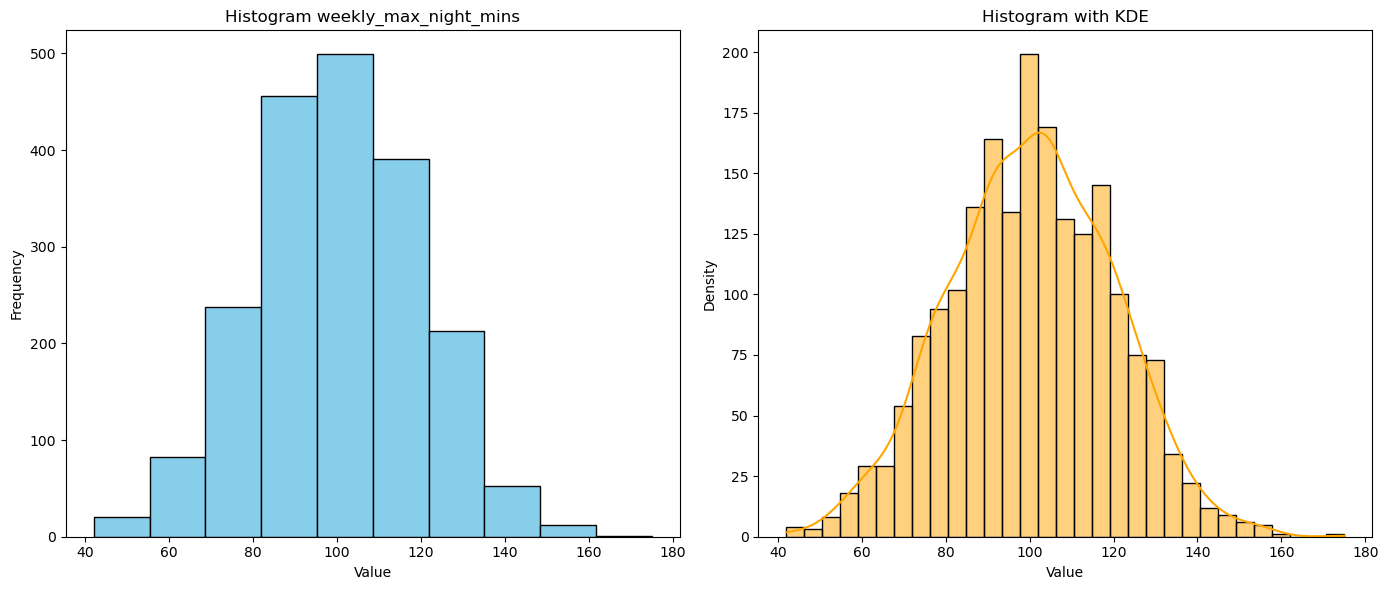

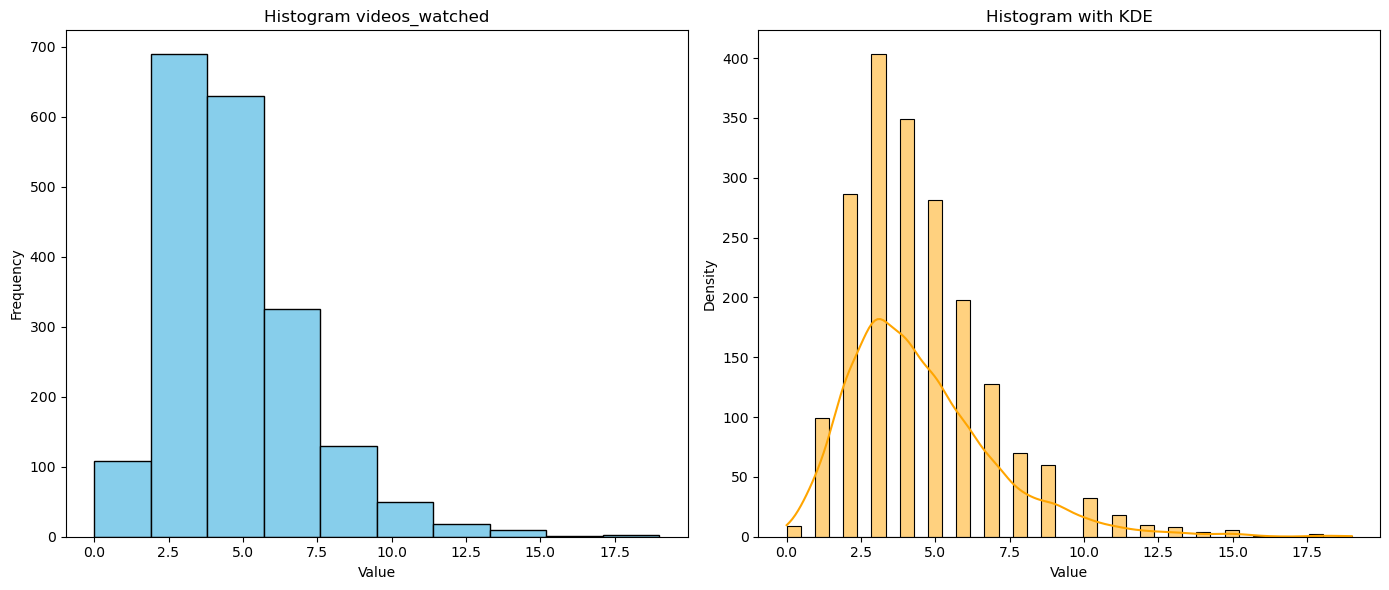

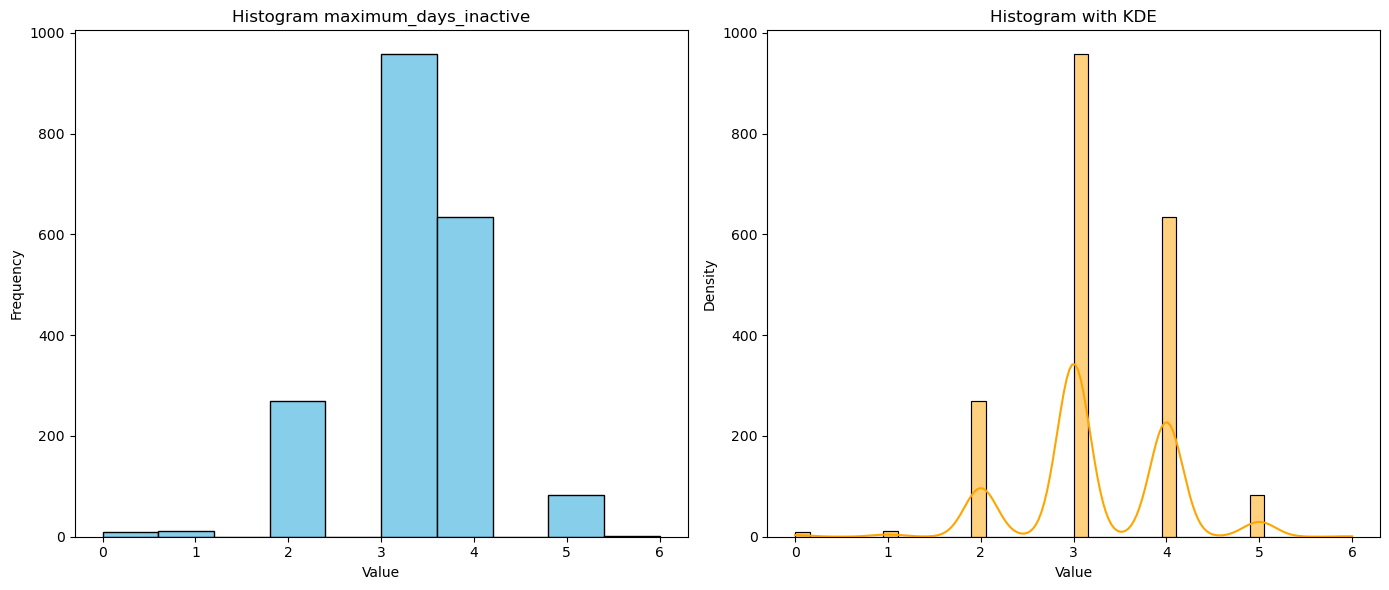

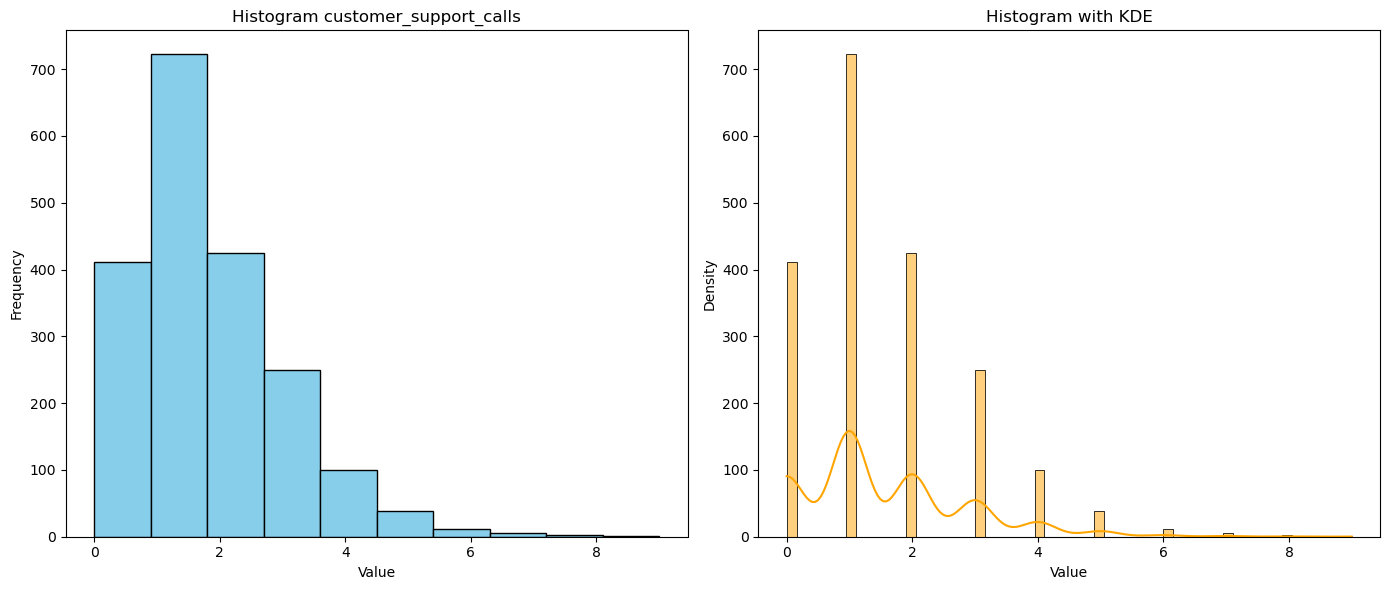

In [60]:
class HistBoxChartTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        df=X.copy()
        # getting num cols
        num_cols = df.select_dtypes(exclude='object').columns
        for con_var in num_cols:
                
            # Create a figure and axes object
            fig, axes = plt.subplots(1, 2, figsize=(14, 6))

            # Plot histogram without KDE on the left
            axes[0].hist(df[con_var], color='skyblue', edgecolor='black')
            axes[0].set_xlabel('Value')
            axes[0].set_ylabel('Frequency')
            axes[0].set_title(f'Histogram {con_var}')

            # Plot histogram with KDE on the right
            sns.histplot(data=df, x=con_var, kde=True, color='orange', edgecolor='black', ax=axes[1])
            axes[1].set_xlabel('Value')
            axes[1].set_ylabel('Density')
            axes[1].set_title('Histogram with KDE')

            # Adjust layout
            plt.tight_layout()

            # Show the combined plot
            plt.show()
pipeline_num_var = Pipeline([
    ('num_uni_variate_analysis', HistBoxChartTransformer())
])

# Fit and transform your data using the pipeline
processed_data = pipeline_num_var.fit_transform(df)        
        

In [61]:
df.columns

Index(['gender', 'age', 'no_of_days_subscribed', 'multi_screen',
       'mail_subscribed', 'weekly_mins_watched', 'minimum_daily_mins',
       'maximum_daily_mins', 'weekly_max_night_mins', 'videos_watched',
       'maximum_days_inactive', 'customer_support_calls', 'churn'],
      dtype='object')

# 8. Numerical - Variables -Outliers Analysis - fillit

# 9. Bi Variate Analyis

In [62]:
cat_vars = df.select_dtypes(include="object").columns
print(cat_vars)

Index(['gender', 'multi_screen', 'mail_subscribed', 'churn'], dtype='object')


## 9.1 Cat vs Cat

churn    No  Yes
gender          
Female  783  126
Male    920  136
churn           No  Yes
multi_screen           
no            1585  184
yes            118   78
churn              No  Yes
mail_subscribed           
no               1193  211
yes               510   51
churn    No  Yes
churn           
No     1703    0
Yes       0  262


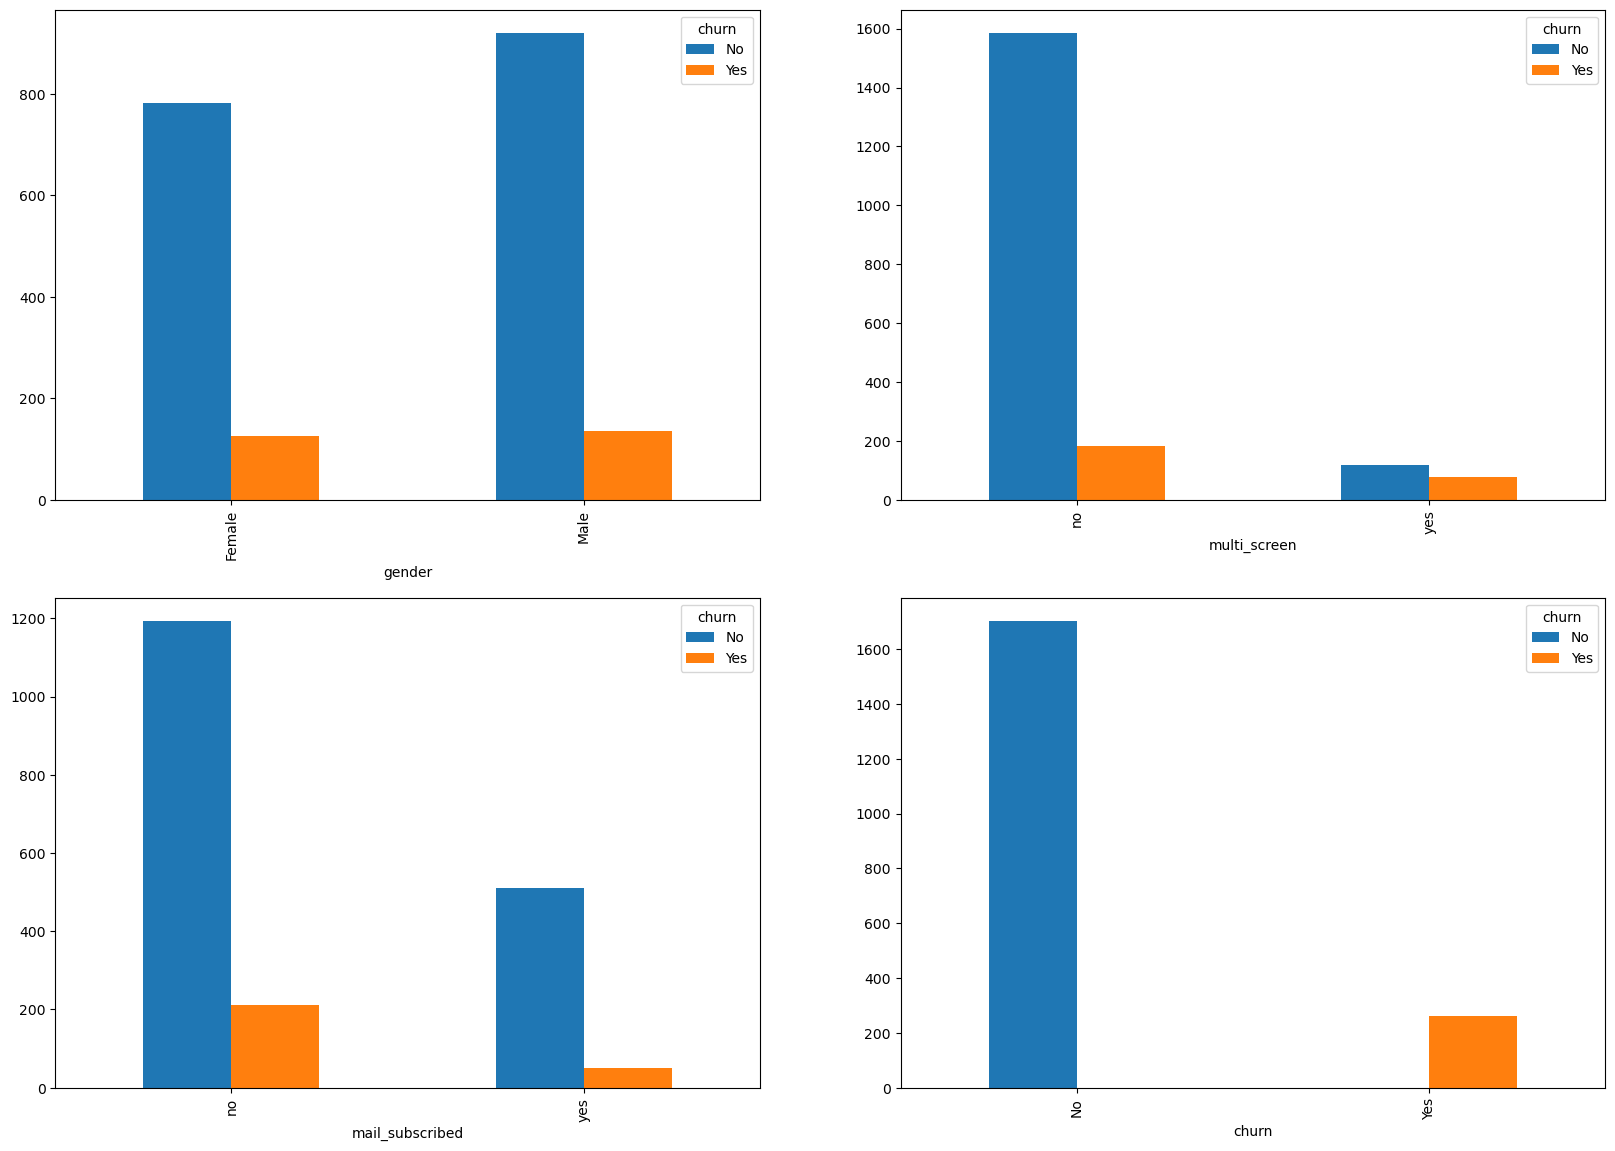

In [63]:
target="churn"
fig,ax = plt.subplots(2,2,figsize=(20,14))
for axi,x in zip(ax.flat,cat_vars):
    col1=df[x]
    col2=df[target]
    result=pd.crosstab(col1,col2)
    print(result)
    print("===============================")
    result.plot(kind='bar',ax=axi)

## 9.2 Num Vs Num

<Axes: >

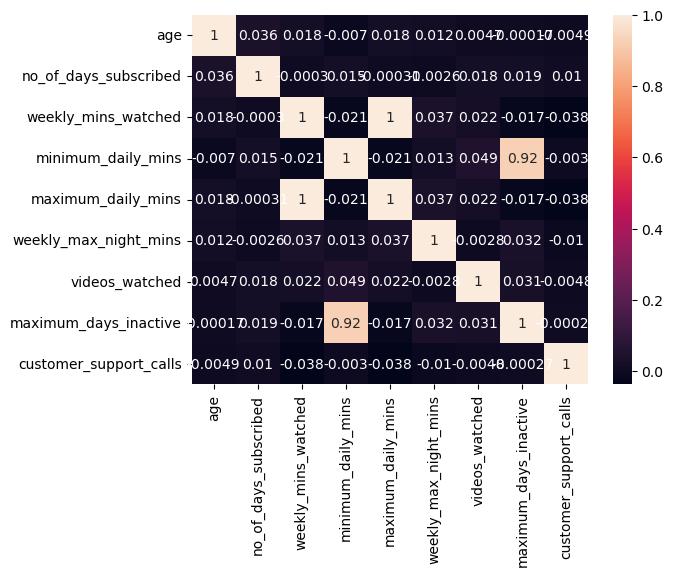

In [64]:
corr_mat=df.corr(numeric_only=True)
sns.heatmap(corr_mat,annot=True)

In [65]:
df.columns


Index(['gender', 'age', 'no_of_days_subscribed', 'multi_screen',
       'mail_subscribed', 'weekly_mins_watched', 'minimum_daily_mins',
       'maximum_daily_mins', 'weekly_max_night_mins', 'videos_watched',
       'maximum_days_inactive', 'customer_support_calls', 'churn'],
      dtype='object')

In [66]:
df.drop("maximum_days_inactive",axis=1,inplace=True)


In [67]:
df.drop("maximum_daily_mins",axis=1,inplace=True)

<Axes: >

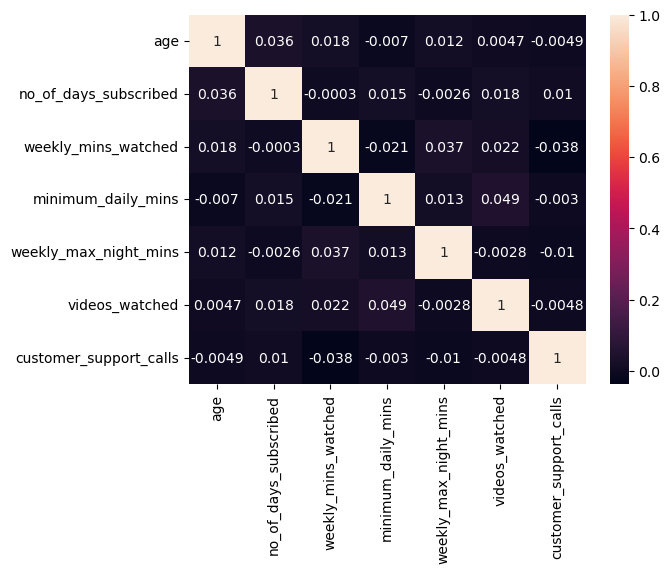

In [68]:
corr_mat=df.corr(numeric_only=True)
sns.heatmap(corr_mat,annot=True)

In [69]:
df.select_dtypes(exclude='object').columns

Index(['age', 'no_of_days_subscribed', 'weekly_mins_watched',
       'minimum_daily_mins', 'weekly_max_night_mins', 'videos_watched',
       'customer_support_calls'],
      dtype='object')

# 11. Standization - Normalization

In [70]:
scaler = StandardScaler()
for var in ['age', 'no_of_days_subscribed', 'weekly_mins_watched',
       'minimum_daily_mins', 'weekly_max_night_mins', 'videos_watched',
       'customer_support_calls']:

# Fit and transform the scaler on the selected columns
    df[var]= scaler.fit_transform(df[[var]])

print(df)

      gender       age  no_of_days_subscribed multi_screen mail_subscribed  \
0     Female -0.264643              -0.946659           no              no   
1     Female  0.029654               1.235009           no              no   
2     Female  2.580235               0.658246           no              no   
3     Female -1.441834               0.783629           no             yes   
4     Female  0.127754               2.288228           no              no   
...      ...       ...                    ...          ...             ...   
1992  Female  0.323952               0.482710           no             yes   
1996    Male  0.618250               0.683323           no              no   
1997    Male  1.403044              -0.144207           no              no   
1998    Male  0.127754              -0.144207           no              no   
1999    Male -0.166544              -0.670816           no              no   

      weekly_mins_watched  minimum_daily_mins  weekly_max_night

# 12. Convert Cat - to - Numerical Columns

In [71]:
cat_vars

Index(['gender', 'multi_screen', 'mail_subscribed', 'churn'], dtype='object')

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for var in cat_vars:
    df[var]=le.fit_transform(df[var])

# 13. SMOTE for Balancing Data

In [73]:
X = df.drop('churn', axis=1)
Y = df['churn']

In [74]:
X, Y = SMOTE().fit_resample(X, Y)
print(X.columns)
print(len(Y),len(X))

Index(['gender', 'age', 'no_of_days_subscribed', 'multi_screen',
       'mail_subscribed', 'weekly_mins_watched', 'minimum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'customer_support_calls'],
      dtype='object')
3406 3406


# 14 DL Models

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state = 42)
print(X_train.shape),
print(X_test.shape),
print(y_train.shape),
print(y_test.shape)

(2724, 10)
(682, 10)
(2724,)
(682,)


In [76]:
import tensorflow as tf
from tensorflow import keras


model = keras.Sequential([
    keras.layers.Dense(64, input_shape=(10,), activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()
history =  model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test) ,epochs=100)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                704       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2817 (11.00 KB)
Trainable params: 2817 (11.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/100
43/43 [==============================] - 1s 5ms/step - loss: 0.6629 - accuracy: 0.6303 - val_loss: 0.5940 - val_accuracy: 0.7346
Epoch 2/100
43/43 [==============================] - 0s 2ms/step - loss: 0.5563 - accuracy: 0.7452 - val_loss: 0.5333 - val_accuracy: 0.7639
Ep

Epoch 53/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1786 - accuracy: 0.9347 - val_loss: 0.2970 - val_accuracy: 0.8783
Epoch 54/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1779 - accuracy: 0.9336 - val_loss: 0.2839 - val_accuracy: 0.8915
Epoch 55/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1730 - accuracy: 0.9405 - val_loss: 0.2839 - val_accuracy: 0.8944
Epoch 56/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1711 - accuracy: 0.9383 - val_loss: 0.2916 - val_accuracy: 0.8944
Epoch 57/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1676 - accuracy: 0.9413 - val_loss: 0.2757 - val_accuracy: 0.9047
Epoch 58/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1626 - accuracy: 0.9464 - val_loss: 0.2820 - val_accuracy: 0.8959
Epoch 59/100
43/43 [==============================] - 0s 2ms/step - loss: 0.1626 - accuracy: 0.9416 - val_loss: 0.2730 - val_accuracy: 0.8974
Epoch 

 # 15 Model Performance 

22/22 [==============================] - 0s 1ms/step - loss: 0.2491 - accuracy: 0.9267


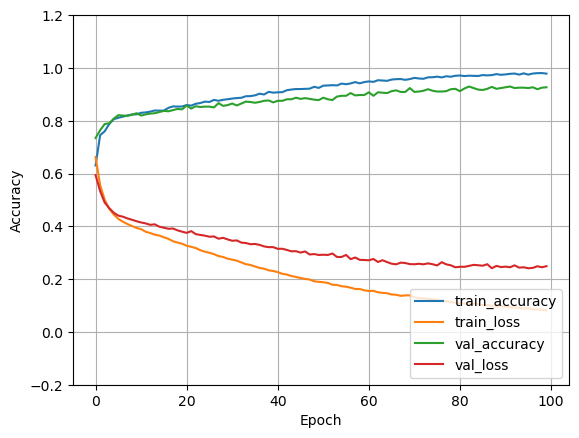

In [77]:
model.evaluate(X_test, y_test)
import matplotlib.pyplot as plt
plt.grid()
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['loss'], label = 'train_loss')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([-0.2, 1.2])
plt.legend(loc='lower right')
plt.show()

In [78]:
from sklearn.metrics import confusion_matrix , classification_report
yp = model.predict(X_test)
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
print(classification_report(y_test,y_pred))


22/22 [==============================] - 0s 980us/step
              precision    recall  f1-score   support

           0       0.95      0.91      0.93       362
           1       0.91      0.94      0.92       320

    accuracy                           0.93       682
   macro avg       0.93      0.93      0.93       682
weighted avg       0.93      0.93      0.93       682



Text(95.72222222222221, 0.5, 'Truth')

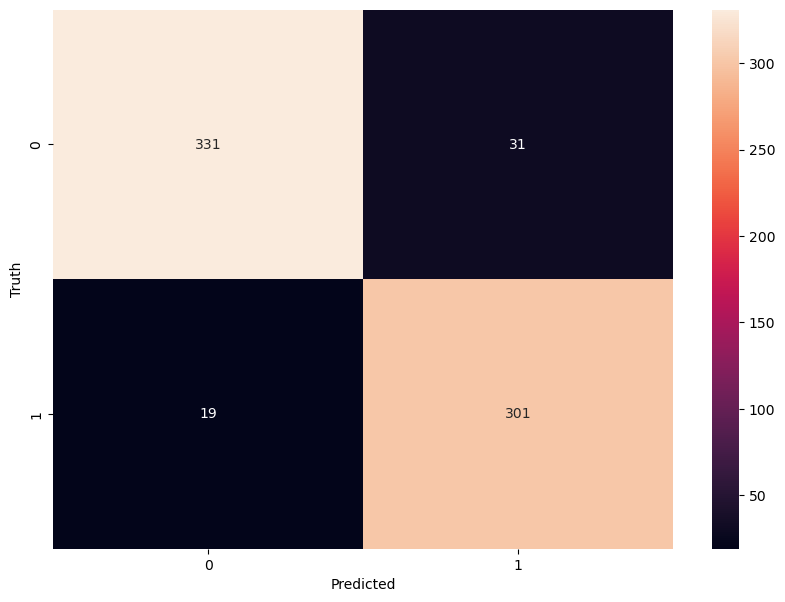

In [79]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [82]:
model.save('telecom_churn_model.h5')

# 16. Conclusion

1. Model Accuracy is 93% ,  F1 Score = 93%